<a href="https://colab.research.google.com/github/bhavanaa16/codecstockai/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
stock = yf.download("AAPL", start="2018-01-01", end="2023-01-01")

print(stock.head())

/tmp/ipython-input-2262431600.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.304173  40.313533  39.602254  39.812832  102223600
2018-01-03  40.297173  40.839992  40.234002  40.367365  118071600
2018-01-04  40.484337  40.587286  40.262063  40.369689   89738400
2018-01-05  40.945251  41.031820  40.489005  40.580254   94640000
2018-01-08  40.793198  41.088002  40.694926  40.793198   82271200


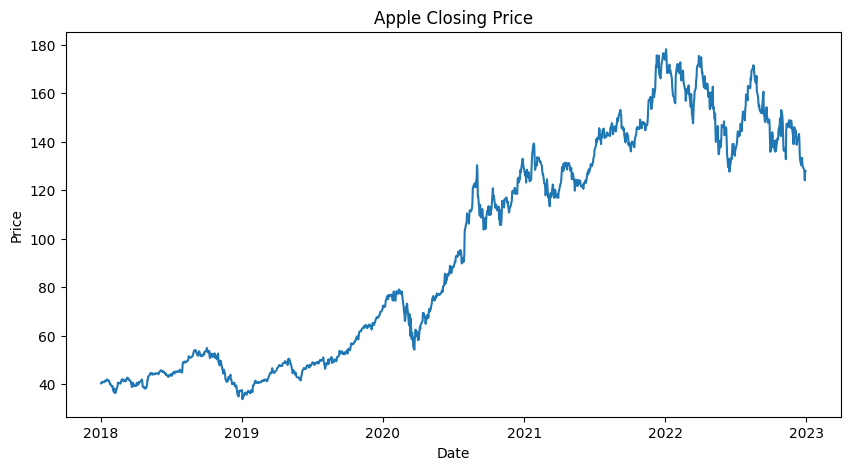

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(stock['Close'])
plt.title("Apple Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
stock['Target'] = stock['Close'].shift(-1)
stock = stock.dropna()

In [ ]:
X = stock[['Open','High','Low','Close','Volume']]
y = stock['Target']

In [ ]:
split_index = int(len(stock) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)

Linear Regression MSE: 11.445822646254902
Linear Regression R2: 0.9286655881506236


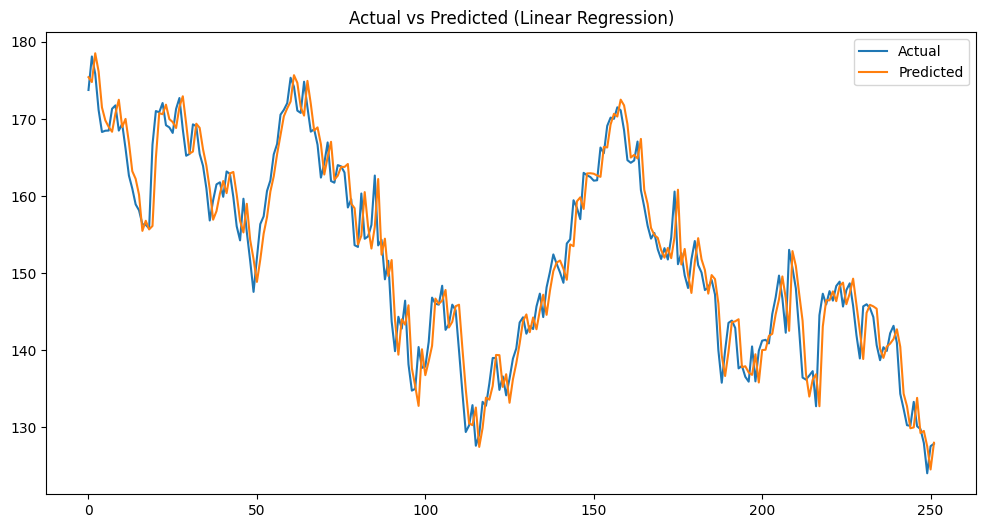

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(lr_predictions, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

Random Forest MSE: 15.807717760616189
Random Forest R2: 0.9014807162416184


In [ ]:
print("Linear Regression R2:", r2)
print("Random Forest R2:", r2_rf)

Linear Regression R2: 0.9286655881506236
Random Forest R2: 0.9014807162416184
